# Coding Etiquette & Excel Reporting Part 1

## Content 

### 1. Importing-Libreries / Data Set 

### 2. Data security check

### 3. Creating a regional segmentation of data

### 4. Creating an exclusion flag for high- and low-activity customers

### 5.Profiling variable age, income, certain goods, number of dependents 

### 6.Visualizations 

### 7.Usage frequency and expenditure 

### 8.Exporting 

# 1. Importing Data Set

In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data 

path=r'/Users/arunibandara/Documents/Achievement4.9'

df_ords_prods_cust=pd.read_pickle(os.path.join(path,'02_Data','prepared_data','Achievement4.9-Task_part1.pkl'))

In [3]:
# Checking dataset 

df_ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,spending_flag,median_days,frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,0.0,196,1,0,195,...,Low spender,20.0,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Low spender,20.0,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,Low spender,20.0,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Low spender,20.0,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,Low spender,20.0,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
df_ords_prods_cust. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 object 
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   Unnamed: 0              int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  prices                  float64
 14  max_order               int64  
 15  loyalty_flag            object 
 16  mean_price              float64
 17  spending_flag           object 
 18  median_days             float64
 19  frequency_flag          object 
 20  gender                  object 
 21  state                   objec

In [5]:
df_ords_prods_cust.shape

(32434212, 27)

# 2. Data Security 

### The data set above has no security implications, since we couldnt identify any  sensitive are names, email addresses, physical addresses, and phone numbers which we can trace back a person with data. 

# 3. Creating a regional segmentation of data

In [6]:
# Check the state column

df_ords_prods_cust['state'].value_counts().sort_index()

Alabama                 638617
Alaska                  649020
Arizona                 654545
Arkansas                636706
California              660447
Colorado                639752
Connecticut             623582
Delaware                637447
District of Columbia    614293
Florida                 629582
Georgia                 657072
Hawaii                  633445
Idaho                   607811
Illinois                633490
Indiana                 627768
Iowa                    626029
Kansas                  637991
Kentucky                632905
Louisiana               638174
Maine                   639149
Maryland                627278
Massachusetts           647000
Michigan                631622
Minnesota               648408
Mississippi             633103
Missouri                641313
Montana                 635835
Nebraska                626297
Nevada                  636697
New Hampshire           616006
New Jersey              628292
New Mexico              655143
New York

In [7]:
# Define the regions according to the Wikipedia article t(https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States)

northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
# Placing the states into regions

df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(northeast), 'region'] = 'Northeast'
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(midwest), 'region'] = 'Midwest'
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(south), 'region'] = 'South'
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(west), 'region'] = 'West'

In [9]:
# cheaking the counts of regions 

df_ords_prods_cust['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [10]:
# checking with the initial data set 

df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 object 
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   Unnamed: 0              int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  prices                  float64
 14  max_order               int64  
 15  loyalty_flag            object 
 16  mean_price              float64
 17  spending_flag           object 
 18  median_days             float64
 19  frequency_flag          object 
 20  gender                  object 
 21  state                   objec

In [11]:
len(df_ords_prods_cust['region'])

32434212

In [12]:
# Determine the difference in spending habits between the regions by 
# creating a crosstab between 'region' and 'spender_flag'

crosstab = pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['spending_flag'], dropna = False)

In [13]:
crosstab

spending_flag,Higher spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


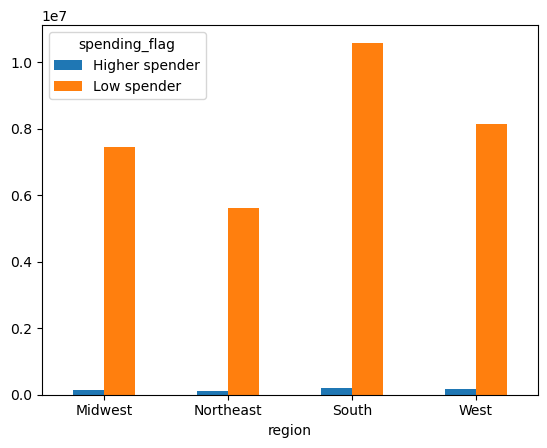

In [14]:
# using above reference-(https://www.geeksforgeeks.org/using-pandas-crosstab-to-create-a-bar-plot/)

barplot_spender = crosstab.plot.bar(rot=0)

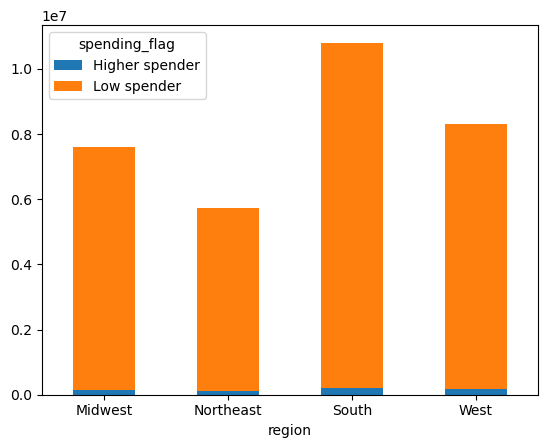

In [15]:
# trying stack bar plot 

barplot_spender_1 = crosstab.plot(kind="bar", stacked=True, rot=0)

# 4. Creating an exclusion flag for low-activity customers

In [16]:
# Create a flag for 'low-activity' and 'High-activity' for customers who order more than 5 orders and less than 5 orders

df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] < 5, 'exclusion_flag'] = 'Low-activity'

df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] >= 5, 'exclusion_flag'] ='High-activity'

In [17]:
df_ords_prods_cust

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,exclusion_flag
0,2539329,1,1,2,8,0.0,196,1,0,195,...,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
2,473747,1,3,3,12,21.0,196,1,1,195,...,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
4,431534,1,5,4,15,28.0,196,1,1,195,...,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434207,156685,106143,26,4,23,5.0,19675,1,1,19676,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High-activity
32434208,484769,66343,1,6,11,0.0,47210,1,0,47214,...,Non_frequent_customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low-activity
32434209,1561557,66343,2,1,11,30.0,47210,1,1,47214,...,Non_frequent_customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low-activity
32434210,276317,66343,3,6,15,19.0,47210,1,1,47214,...,Non_frequent_customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low-activity


In [18]:
# Verify that column is updated

df_ords_prods_cust['exclusion_flag'].value_counts(dropna = False)

High-activity    30992664
Low-activity      1441548
Name: exclusion_flag, dtype: int64

In [19]:
# verifing if the all rows are updated 

len(df_ords_prods_cust['exclusion_flag'])

32434212

In [20]:
# Create a new dataframe to store the high-activity and low-activity customers 

df_high_activity = df_ords_prods_cust.loc[df_ords_prods_cust['exclusion_flag'] == 'High-activity']

In [21]:
df_low_activity = df_ords_prods_cust.loc[df_ords_prods_cust['exclusion_flag'] == 'Low-activity']

In [22]:
df_low_activity.shape

(1441548, 29)

In [23]:
df_high_activity.shape

(30992664, 29)

In [24]:
# Expeorting seperate data frames as pickel format 

path=r'/Users/arunibandara/Documents/Achievement 4.10 part 1'

df_low_activity.to_pickle(os.path.join(path, '02_Data', 'Prepared data ','low_activity_customers.pkl'))

In [25]:
df_high_activity.to_pickle(os.path.join(path, '02_Data', 'Prepared data ','high_activity_customers.pkl'))

### 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

### 6.Create an appropriate visualization to show the distribution of profiles.

###  7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [26]:
# import high_activity_custm data

df_high_activity_custm = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared data ','high_activity_customers.pkl'))

In [27]:
# Cheaking the data set 

df_high_activity_custm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30992664 entries, 0 to 32434207
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 object 
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   Unnamed: 0              int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  prices                  float64
 14  max_order               int64  
 15  loyalty_flag            object 
 16  mean_price              float64
 17  spending_flag           object 
 18  median_days             float64
 19  frequency_flag          object 
 20  gender                  object 
 21  state                   objec

In [28]:
# importing dataframe

path=r'/Users/arunibandara/Documents/Achievement4.4-new'

df_dept=pd.read_csv(os.path.join(path, '02 Data', 'prepared_data', 'department_wrangled_new1.csv'), index_col = False)

In [29]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [30]:
df_dept.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [31]:
df_dept.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


# Creating profile based on age 

In [32]:
df_high_activity_custm.describe()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,mean_price,median_days,age,number_dependants,income
count,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07
mean,1.710321e+06,1.783372e+01,2.741342e+00,1.341082e+01,1.023037e+01,2.557757e+04,8.361651e+00,6.062036e-01,2.557927e+04,7.120896e+01,9.924801e+00,1.193448e+01,3.442563e+01,1.193448e+01,9.338292e+00,4.946793e+01,1.501798e+00,9.967322e+04
std,9.873797e+05,1.763399e+01,2.089226e+00,4.248811e+00,8.693433e+00,1.409313e+04,7.135006e+00,4.885906e-01,1.409468e+04,3.821479e+01,6.282146e+00,4.911216e+02,2.489426e+01,7.987316e+01,6.077146e+00,1.848520e+01,1.118902e+00,4.313928e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554110e+05,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,1.353500e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.398110e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.728900e+04
50%,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,2.525700e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.829827e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565216e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.793100e+04,1.100000e+01,1.000000e+00,3.793500e+04,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.253606e+00,1.100000e+01,6.500000e+01,3.000000e+00,1.281010e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,4.969200e+04,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [33]:
df_high_activity_custm['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### Minimum age =18     Maximum age =81 
### Therefore the age groups can be categorized as 18-39=Young age , 40-65= Middle age and  65 + = Elderly age

In [34]:
# creating conditions for each ge groups 

df_high_activity_custm.loc[(df_high_activity_custm['age'] >=18) & (df_high_activity_custm['age'] < 40), 'agecategory_flag'] = 'Young age'

In [35]:
df_high_activity_custm.loc[(df_high_activity_custm['age'] >=40) & (df_high_activity_custm['age'] < 65), 'agecategory_flag'] = 'Middle age'

In [36]:
df_high_activity_custm.loc[(df_high_activity_custm['age'] >=65),'agecategory_flag'] = 'Elderly age'

In [37]:
df_high_activity_custm['agecategory_flag'].value_counts(dropna = False)

Middle age     12115268
Young age      10674650
Elderly age     8202746
Name: agecategory_flag, dtype: int64

In [38]:
# verifing the updted data set 

df_high_activity_custm.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,gender,state,age,date_joined,number_dependants,family_status,income,region,exclusion_flag,agecategory_flag
0,2539329,1,1,2,8,0.0,196,1,0,195,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Young age
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Young age
2,473747,1,3,3,12,21.0,196,1,1,195,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Young age
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Young age
4,431534,1,5,4,15,28.0,196,1,1,195,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Young age


### Among highest active customers, the  'middle age' age group has the highest activity in Instacart orders. 

In [39]:
# creating a crosstab on agecategory_flag and family_status

crosstab_age_familystatus = pd.crosstab (df_high_activity_custm['agecategory_flag'], df_high_activity_custm['family_status'], dropna = False)

In [40]:
crosstab_age_familystatus 

family_status,divorced/widowed,living with parents and siblings,married,single
agecategory_flag,,,,
Elderly age,2023913,0,6178833,0
Middle age,623848,0,9055095,2436325
Young age,0,1482611,6529093,2662946


### According to the above it shows that  above middle age -married are the higest category for active orders

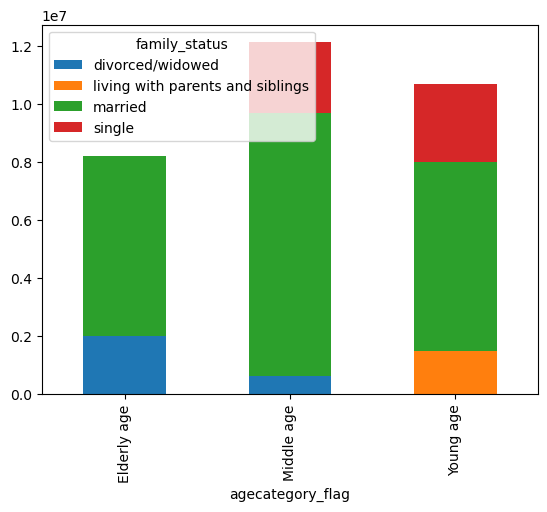

In [41]:
# Create a stacked bar chart

bar_chart_age_familystatus = crosstab_age_familystatus.plot(kind='bar', stacked=True)

In [42]:
# Age category usage frequency aggregation

df_high_activity_custm.groupby('agecategory_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
agecategory_flag                         
Elderly age       11.758945  1.0  99999.0
Middle age        11.945818  1.0  99999.0
Young age         12.056513  1.0  99999.0

#### Average price amount of payment for order is around 12  for all the age categories

# Creating profile based on Income

In [43]:
# Cheaking for data

df_high_activity_custm['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

### The minimum income is 25,900, and the maximum is 593,900. 
### Therefore the grouping can be done: low = <70,000, middle-class =70,000-130,000  and high = >130,000

In [44]:
# Creating conditions for each ge groups 

df_high_activity_custm.loc[df_high_activity_custm['income']< 70000, 'incomecategory_flag'] = 'Low'

In [45]:
df_high_activity_custm.loc[(df_high_activity_custm['income']>= 70000) & (df_high_activity_custm['income']< 130000), 'incomecategory_flag'] = 'Middle'

In [46]:
#df_high_activity_custm.loc[(df_high_activity_custm['income']>= 100000) & (df_high_activity_custm['income']< 130000), 'incomecategory_flag'] = 'Upper-middle'

In [47]:
df_high_activity_custm.loc[df_high_activity_custm['income']>= 130000, 'incomecategory_flag'] = 'High'

In [48]:
# verifing the updted data set 

df_high_activity_custm['incomecategory_flag'].value_counts(dropna = False)

Middle    15056002
Low        8528821
High       7407841
Name: incomecategory_flag, dtype: int64

In [49]:
df_high_activity_custm.head(3)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,state,age,date_joined,number_dependants,family_status,income,region,exclusion_flag,agecategory_flag,incomecategory_flag
0,2539329,1,1,2,8,0.0,196,1,0,195,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Young age,Low
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Young age,Low
2,473747,1,3,3,12,21.0,196,1,1,195,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Young age,Low


### Low income customers are the highest category of the customers.

In [50]:
# Creating a crosstab on incomecategory_flag and region 

crosstab__region_income = pd.crosstab (df_high_activity_custm['region'], df_high_activity_custm['incomecategory_flag'], dropna = False)

In [51]:
crosstab__region_income

incomecategory_flag,High,Low,Middle
region,,,
Midwest,1764469,1976099,3527139
Northeast,1310208,1488246,2671614
South,2444798,2852440,5023224
West,1888366,2212036,3834025


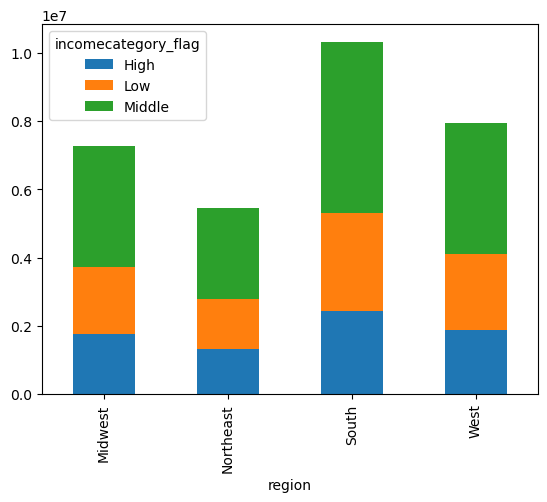

In [52]:
# Create a stacked bar chart

bar_chart_region_income  =crosstab__region_income.plot(kind='bar', stacked=True)

#### Highly active customers are based on the south region and among the low income cusomer category shows high activity 

In [53]:
#income category expenditure aggregation

df_high_activity_custm.groupby('incomecategory_flag').agg({'prices' : ['mean', 'min', 'max']})

prices              
                          mean  min      max
incomecategory_flag                         
High                 22.380069  1.0  99999.0
Low                   7.372050  1.0  14900.0
Middle                9.379555  1.0  99999.0

#### According to so far data obtained average expenditure fro highly active customer category is Low income customers and is about 8

In [54]:
df_high_activity_custm.groupby('incomecategory_flag').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                                 mean min  max
incomecategory_flag                           
High                         8.479243   1  121
Low                          7.964520   1  137
Middle                       8.528757   1  145

# Creating profile based on departments and certain goods 

In [55]:
# Code Explain ask ?

In [56]:
# create dictionary 

dept_list = dict(zip(df_dept['department_id'], df_dept['department']))

In [57]:
dept_list

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [58]:
df_high_activity_custm['department'] = df_high_activity_custm['department_id'].map(dept_list)

In [59]:
# Cheacking for data 

df_high_activity_custm['department'].value_counts(dropna = False)

produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

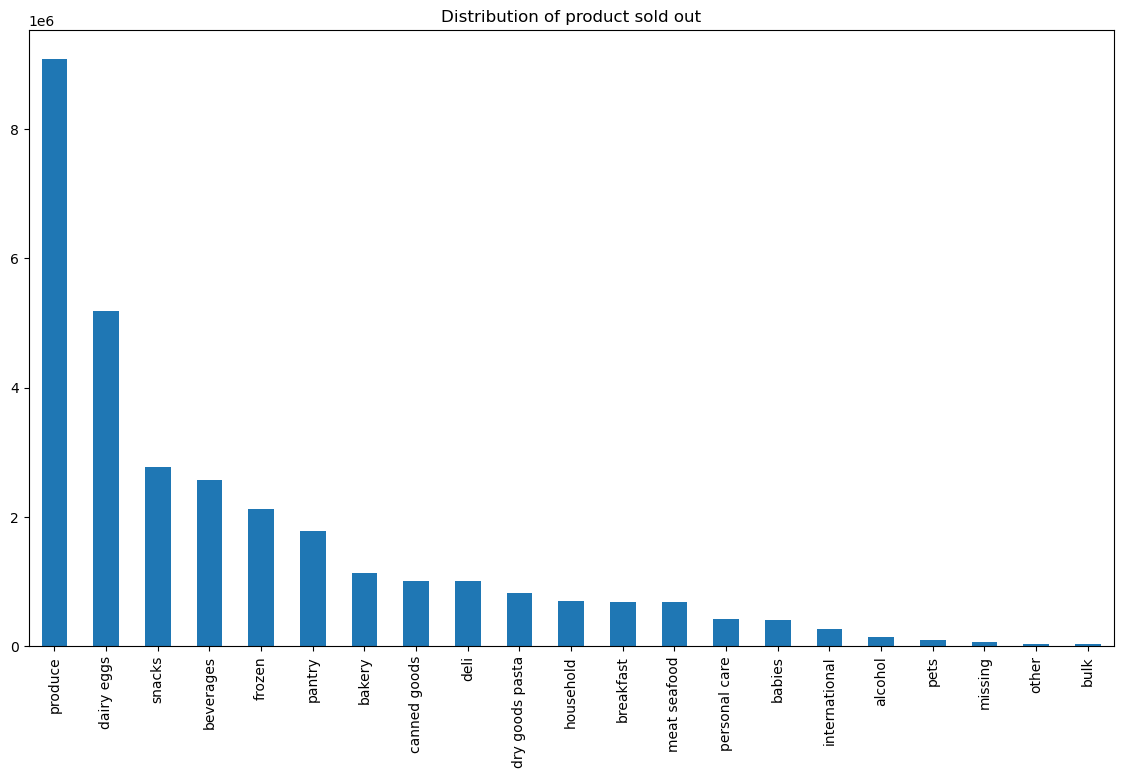

In [60]:
bar_products=df_high_activity_custm['department'].value_counts().plot(kind='bar',figsize=(14,8),title="Distribution of product sold out")

In [61]:
# Customers based on behavioral Market

# Create petavailable_flag column

df_high_activity_custm.loc[df_high_activity_custm['department'] !='pets', 'petavailable_flag'] = 'No'
df_high_activity_custm.loc[df_high_activity_custm['department'] =='pets', 'petavailable_flag'] = 'Yes'

In [62]:
df_high_activity_custm['petavailable_flag'].value_counts(dropna = False)

No     30899599
Yes       93065
Name: petavailable_flag, dtype: int64

In [63]:
df_high_activity_custm.head(3)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,date_joined,number_dependants,family_status,income,region,exclusion_flag,agecategory_flag,incomecategory_flag,department,petavailable_flag
0,2539329,1,1,2,8,0.0,196,1,0,195,...,2/17/2019,3,married,40423,South,High-activity,Young age,Low,beverages,No
1,2398795,1,2,3,7,15.0,196,1,1,195,...,2/17/2019,3,married,40423,South,High-activity,Young age,Low,beverages,No
2,473747,1,3,3,12,21.0,196,1,1,195,...,2/17/2019,3,married,40423,South,High-activity,Young age,Low,beverages,No


In [64]:
# crosstab on petavailable_flag and regions

crosstab_pets_regions = pd.crosstab (df_high_activity_custm['region'], df_high_activity_custm['petavailable_flag'], dropna = False)

In [65]:
crosstab_pets_regions

petavailable_flag,No,Yes
region,,
Midwest,7246349,21358
Northeast,5452334,17734
South,10290550,29912
West,7910366,24061


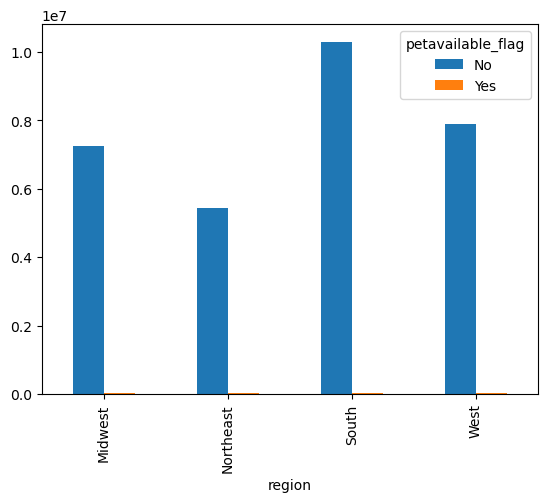

In [66]:
# Create a grouped bar chart

bar_pet_chart = crosstab_pets_regions.plot(kind='bar')

<AxesSubplot:xlabel='region'>

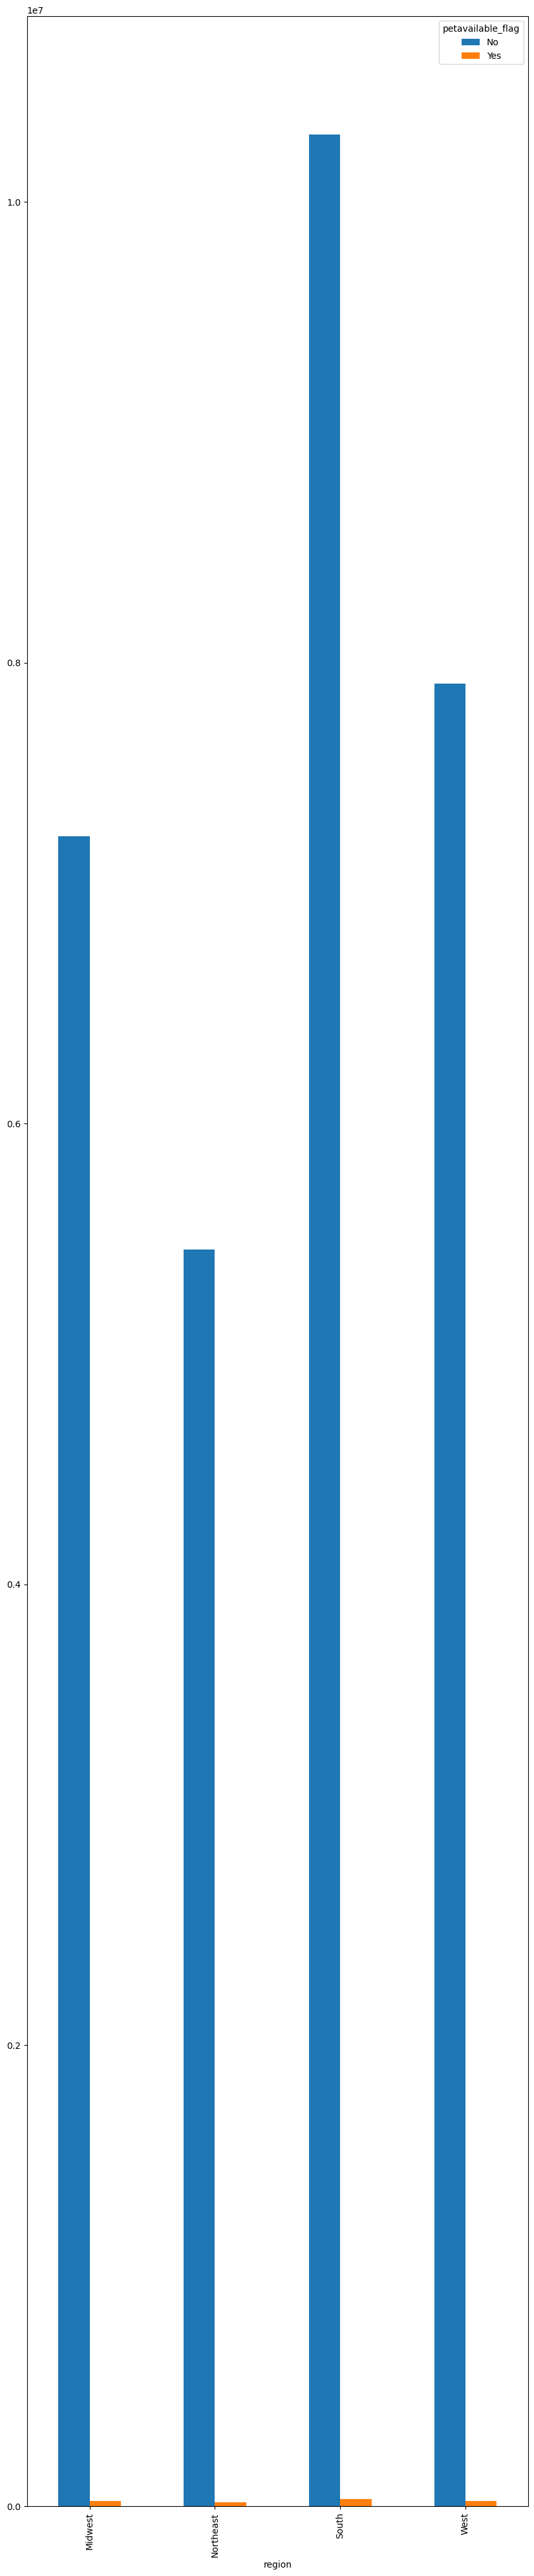

In [67]:
# resizing the chart to visible clearly 

crosstab_pets_regions.plot.bar(figsize = (10, 50))

In [68]:
# profiling according to order hour 

df_high_activity_custm['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      208208
1      109704
2       65740
3       48831
4       50802
5       84508
6      281282
7      864060
8     1660870
9     2365985
10    2652281
11    2617231
12    2497952
13    2541503
14    2570222
15    2538243
16    2415842
17    1984054
18    1552536
19    1194898
20     931727
21     763806
22     607549
23     384830
Name: order_hour_of_day, dtype: int64

In [69]:
# Creating timeperiod_flag for monitor the customer base on order_hour_of_day

df_high_activity_custm.loc[df_high_activity_custm['order_hour_of_day'] <=5 , 'timeperiod_flag'] = 'Morning time customer'

In [70]:
df_high_activity_custm.loc[(df_high_activity_custm['order_hour_of_day']>= 6) & (df_high_activity_custm['order_hour_of_day']<= 19), 'timeperiod_flag'] = 'Regular day Customer'

In [71]:
df_high_activity_custm.loc[(df_high_activity_custm['order_hour_of_day']>= 20) , 'timeperiod_flag'] = 'Night time customer'

In [72]:
df_high_activity_custm['timeperiod_flag'].value_counts(dropna = False)

Regular day Customer     27736959
Night time customer       2687912
Morning time customer      567793
Name: timeperiod_flag, dtype: int64

In [73]:
#crosstab on incomecategory_flag and timeperiod_flag

crosstab_income_time = pd.crosstab (df_high_activity_custm['incomecategory_flag'], df_high_activity_custm['timeperiod_flag'], dropna = False)

In [74]:
crosstab_income_time

timeperiod_flag,Morning time customer,Night time customer,Regular day Customer
incomecategory_flag,,,
High,133846,651700,6622295
Low,154298,712474,7662049
Middle,279649,1323738,13452615


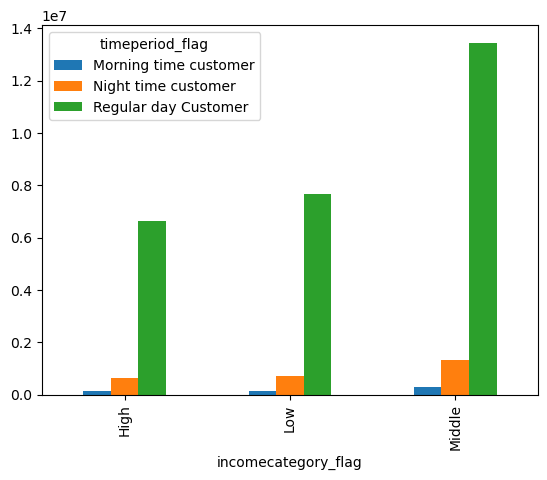

In [75]:
bar_income_time = crosstab_income_time .plot(kind='bar')

In [76]:
# Creating expenditure aggregation

df_high_activity_custm.groupby('timeperiod_flag').agg({'prices' : ['mean', 'min', 'max']})

prices              
                            mean  min      max
timeperiod_flag                               
Morning time customer  11.661904  1.0  99999.0
Night time customer    10.925765  1.0  99999.0
Regular day Customer   12.037817  1.0  99999.0

#### According to the table Regualr day time, Low income customers are the active customers and they spend average of 12 (price units)

In [77]:
df_high_activity_custm.groupby('timeperiod_flag').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                                   mean min  max
timeperiod_flag                                 
Morning time customer          8.590509   1  109
Night time customer            8.715847   1  137
Regular day Customer           8.322641   1  145

# Exporting 

In [78]:
path=r'/Users/arunibandara/Documents/Achievement 4.10 part 1'

barplot_spender.figure.savefig(os.path.join(path,'04_Analysis','Visualization ','barplot_spender.png'))

In [79]:
barplot_spender_1.figure.savefig(os.path.join(path,'04_Analysis','Visualization ','barplot_spender_1.png'))

In [80]:
bar_chart_age_familystatus.figure.savefig(os.path.join(path,'04_Analysis','Visualization ','bar_chart_age_familystatus.png'))

In [81]:
bar_chart_region_income.figure.savefig(os.path.join(path,'04_Analysis','Visualization ','bar_chart_region_ncome.png'))

In [82]:
bar_pet_chart.figure.savefig(os.path.join(path,'04_Analysis','Visualization ','bar_pet_chart.png'))

In [83]:
bar_income_time.figure.savefig(os.path.join(path,'04_Analysis','Visualization ','bar_income_time.png')) 

In [84]:
bar_products.figure.savefig(os.path.join(path,'04_Analysis','Visualization ','bar_products.png')) 

In [85]:
df_ords_prods_cust['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [86]:
df_3=df_ords_prods_cust['region'].value_counts(dropna = False)

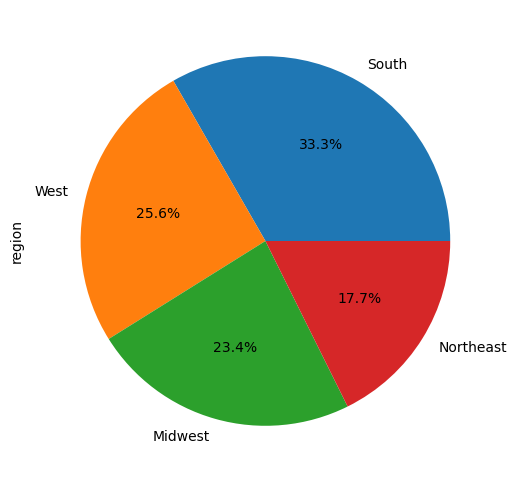

In [88]:
plot_pie = df_3.plot.pie(subplots=True, figsize=(11, 6),autopct='%1.1f%%')